### 1. Keras Sequential model:

In [23]:
"import librairies"
import numpy as np 
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.models import Sequential # TODO learn about this model
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


#### 1.1. Read in the data and explore:

In [24]:
df = pd.read_csv('data_boston.csv')

In [25]:
# View.
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [26]:
df.shape

(506, 14)

In [27]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [28]:
# Scale the X data use min max scaller and fit transform.
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()
scaler.fit(df)
scaled_data = pd.DataFrame(scaler.transform(df),columns=df.columns)
scaled_data.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333


In [43]:
# Spit the data into training and testing.
x = scaled_data.loc[:,scaled_data.columns != 'PRICE']
y = scaled_data['PRICE']
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=42)
x_model, x_valid, y_model, y_valid = train_test_split(x_train, y_train,test_size = 0.2)
#x_train

#### 1.2. Define a Sequential model:

In [45]:
# Add layers on a Sequential object.
my_model1 = Sequential()
my_model1.add(Dense(input_dim = x.shape[1], units = 1, activation="linear"))    # Add a output layer for linear regression.

In [46]:
# Summary of the model.
my_model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


#### 1.3. Define the hyperparameters and optimizer:

In [105]:
# Hyperparameters.
n_epochs = 400
batch_size = 100
learn_rate =0.01

In [52]:
x_model.shape

(323, 13)

In [49]:
from tensorflow.keras.optimizers import Adam

#### 1.4. Train the model and visualize the history:

In [106]:
# Define the optimizer and then compile.
model= Sequential([
   Dense(32, input_dim = 13, activation='relu'),  
   Dense(32,  activation='relu'),
   Dense(32,  activation='relu'),
   Dense(32,  activation='relu'),
   Dense(32,  activation='relu'),
   Dense(60,  activation='tanh'),
   Dense(32,  activation='relu'),
   Dense(32,  activation='tanh'),    
   Dense(1, activation='linear')])



model.compile(loss='MAE', optimizer=Adam(lr=learn_rate), metrics=["MSE"]) # Configure the model for training
history = model.fit(x_model, y_model, batch_size=batch_size,validation_data=(x_valid, y_valid), epochs= n_epochs) #training

Epoch 1/400
4/4 [==============================] - 1s 49ms/step - loss: 0.3733 - MSE: 0.1819 - val_loss: 0.2802 - val_MSE: 0.1169
Epoch 2/400
4/4 [==============================] - 0s 10ms/step - loss: 0.2402 - MSE: 0.0940 - val_loss: 0.1647 - val_MSE: 0.0523
Epoch 3/400
4/4 [==============================] - 0s 11ms/step - loss: 0.1546 - MSE: 0.0456 - val_loss: 0.1872 - val_MSE: 0.0499
Epoch 4/400
4/4 [==============================] - 0s 10ms/step - loss: 0.1792 - MSE: 0.0471 - val_loss: 0.1672 - val_MSE: 0.0422
Epoch 5/400
4/4 [==============================] - 0s 10ms/step - loss: 0.1476 - MSE: 0.0390 - val_loss: 0.1420 - val_MSE: 0.0401
Epoch 6/400
4/4 [==============================] - 0s 10ms/step - loss: 0.1371 - MSE: 0.0398 - val_loss: 0.1394 - val_MSE: 0.0405
Epoch 7/400
4/4 [==============================] - 0s 10ms/step - loss: 0.1302 - MSE: 0.0373 - val_loss: 0.1305 - val_MSE: 0.0335
Epoch 8/400
4/4 [==============================] - 0s 11ms/step - loss: 0.1214 - MSE: 0.03

In [95]:
# View the keys.
my_summary= model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 32)                448       
                                                                 
 dense_40 (Dense)            (None, 32)                1056      
                                                                 
 dense_41 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________


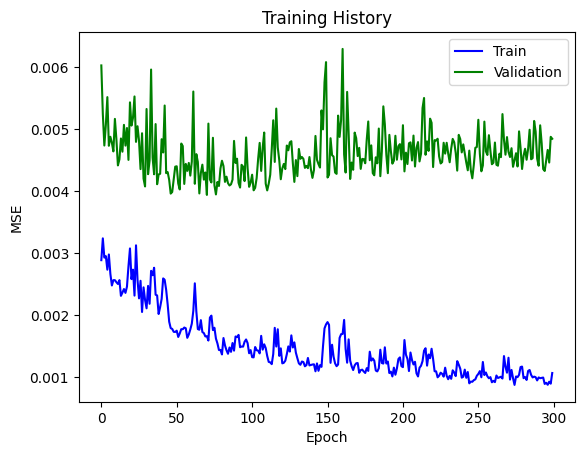

In [107]:
# Visualize the training history. 
n_skip = 100                 # Skip the first few steps.
plt.plot(history.history['MSE'][n_skip:], c="b")
plt.plot(history.history['val_MSE'][n_skip:], c="g")
plt.title('Training History')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

#### 1.5. Testing: 

In [108]:
# Predict and test using a formula.
y_pred = model.predict(x_test)

4/4 [==============================] - 0s 1ms/step


In [110]:
# Use the evaluate() method.
from sklearn.metrics import mean_squared_error

In [111]:
mean_squared_error(y_test,y_pred)

0.008448362621742924